In [1]:
import scipy.io as sio

def load_pavia():
    """Load Pavia University dataset"""
    # Note: Replace these paths with actual paths to your data
    data = sio.loadmat('/home/josh/Documents/Repos/SWEG 5350/Final/Data/Pavia.mat')['pavia']
    labels = sio.loadmat('/home/josh/Documents/Repos/SWEG 5350/Final/Data/Pavia_gt.mat')['pavia_gt']
    return data, labels

def load_indian_pines():
    """Load Indian Pines dataset"""
    # Note: Replace these paths with actual paths to your data
    data = sio.loadmat('/home/josh/Documents/Repos/SWEG 5350/Final/Data/Indian_pines_corrected.mat')['indian_pines_corrected']
    labels = sio.loadmat('/home/josh/Documents/Repos/SWEG 5350/Final/Data/Indian_pines_gt.mat')['indian_pines_gt']
    return data, labels

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_spectral_profiles(data, labels):
   """
   Plot spectral profiles for each unique label in the dataset.
   
   Parameters:
   data (numpy.ndarray): HSI data with shape [height, width, bands]
   labels (numpy.ndarray): Label data with shape [height, width]
   """
   # Get the unique labels
   unique_labels = np.unique(labels)
   
   # Create a figure and axis
   fig, ax = plt.subplots(figsize=(10, 6))
   
   # Plot one example of each label
   for label in unique_labels:
       # Find pixels with the current label
       label_mask = (labels == label)
       
       # Get the indices of the pixels with the current label
       label_indices = np.where(label_mask)
       
       # Choose a random pixel from the selected pixels
       random_index = np.random.choice(len(label_indices[0]))
       pixel_y, pixel_x = label_indices[0][random_index], label_indices[1][random_index]
       
       # Get the spectral profile for the chosen pixel
       spectral_profile = data[pixel_y, pixel_x, :]
       
       # Plot the spectral profile
       ax.plot(spectral_profile, label=f'Label {label}')
   
   # Add labels and legend
   ax.set_xlabel('Wavelength')
   ax.set_ylabel('Reflectance')
   ax.set_title('Spectral Profiles by Label')
   ax.legend()
   
   # Show the plot
   plt.tight_layout()
   plt.show()

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def plot_pca_image(data, n_components=3):
    """
    Apply PCA to the HSI data and visualize the first few principal components.
    
    :param data: HSI data (3D array with shape [height, width, bands])
    :param n_components: Number of principal components to visualize (typically 3)
    """
    # Reshape the data to [height * width, bands] for PCA
    height, width, bands = data.shape
    data_reshaped = data.reshape((height * width, bands))
    
    # Standardize the data (important for PCA)
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_reshaped)
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(data_scaled)
    
    # Reshape the result back to image dimensions
    pca_image = pca_result.reshape((height, width, n_components))
    
    # Visualize the first 3 principal components
    plt.figure(figsize=(12, 4))
    for i in range(n_components):
        plt.subplot(1, n_components, i+1)
        plt.imshow(pca_image[:, :, i], cmap='gray')
        plt.title(f"Principal Component {i+1}")
        plt.axis('off')
    plt.show()

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_hsi_cube_slices(data):
    """
    Visualize the HSI data as a cube with certain layers (bands) broken out to show the reflectance values.
    
    :param data: HSI data (3D array with shape [height, width, bands])
    """
    # Get the dimensions of the HSI data
    height, width, bands = data.shape
    
    # Create a figure
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Coordinates for the cube: we use height, width, and bands as the extent
    x = np.arange(width)
    y = np.arange(height)
    z = np.arange(bands)
    X, Y = np.meshgrid(x, y)
    
    # Loop through the bands and plot slices
    for band in range(0, bands, int(bands/4)):  # Show only a few bands as slices
        Z = data[:, :, band]  # Slice data at the current band
        ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.5, rstride=10, cstride=10)
    
    # Set plot labels and title
    ax.set_title("HSI Data Cube with Selected Bands", fontsize=14, fontweight='bold')
    ax.set_xlabel('Width', fontsize=12)
    ax.set_ylabel('Height', fontsize=12)
    ax.set_zlabel('Reflectance', fontsize=12)

    # Customize the view angle for better visualization
    ax.view_init(30, 45)

    # Add cube boundaries
    ax.set_xlim(0, width)
    ax.set_ylim(0, height)
    ax.set_zlim(np.min(data), np.max(data))

    # Show the plot
    plt.tight_layout()
    plt.show()

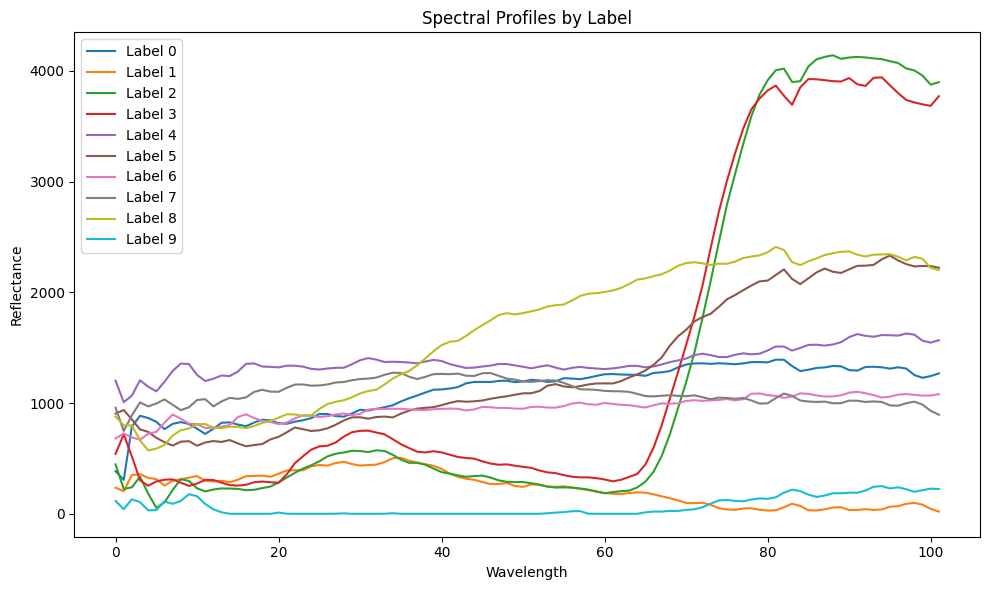

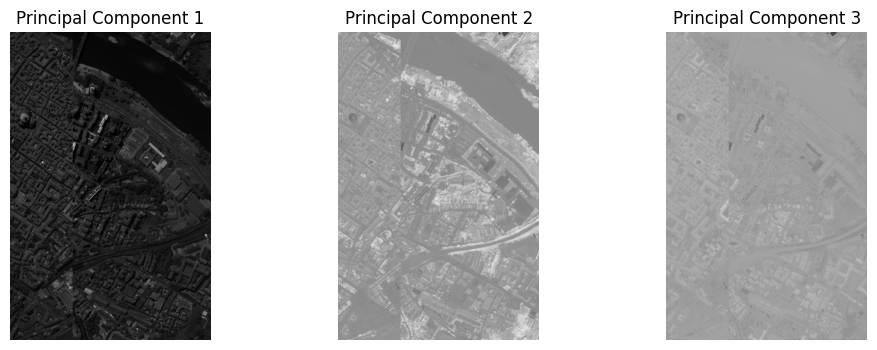

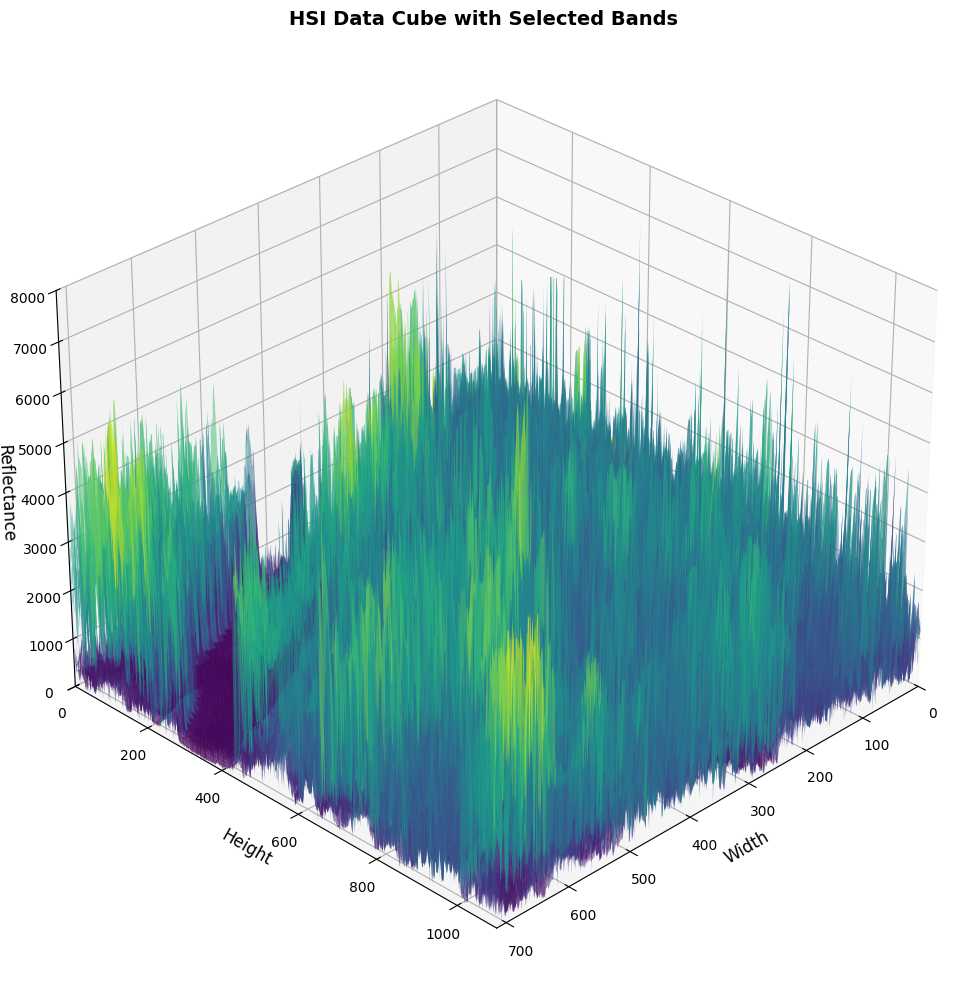

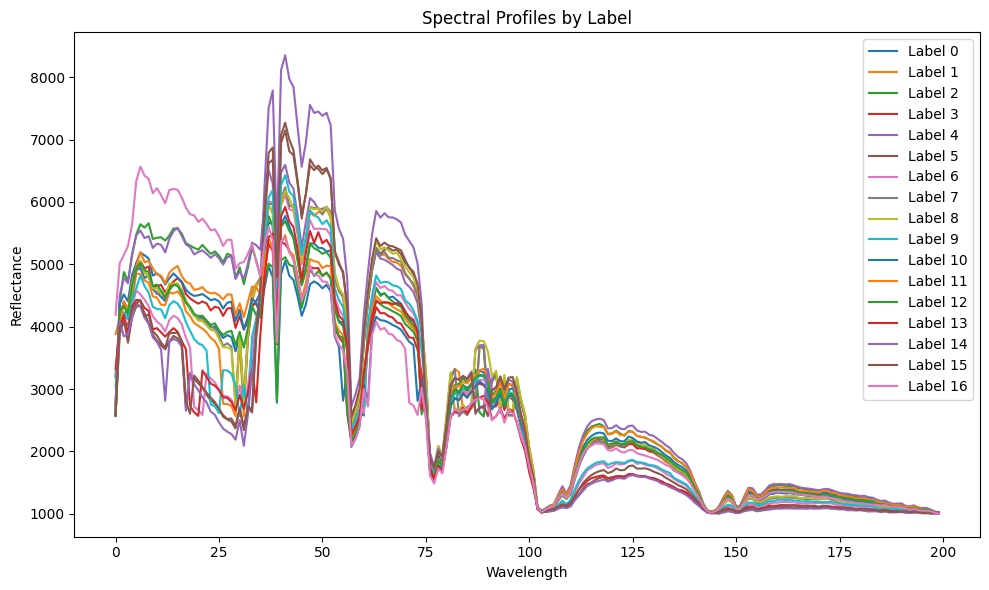

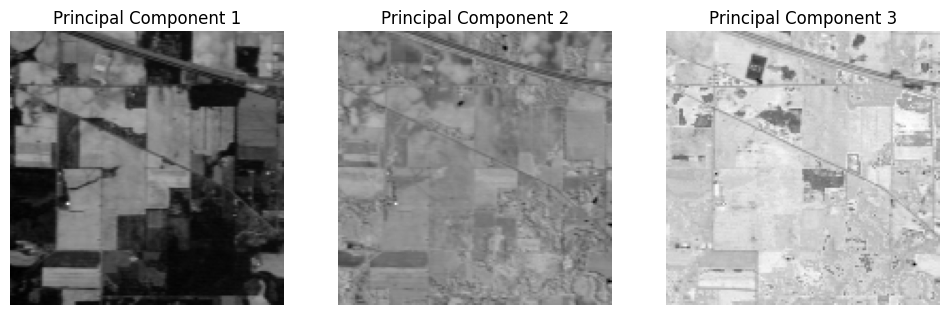

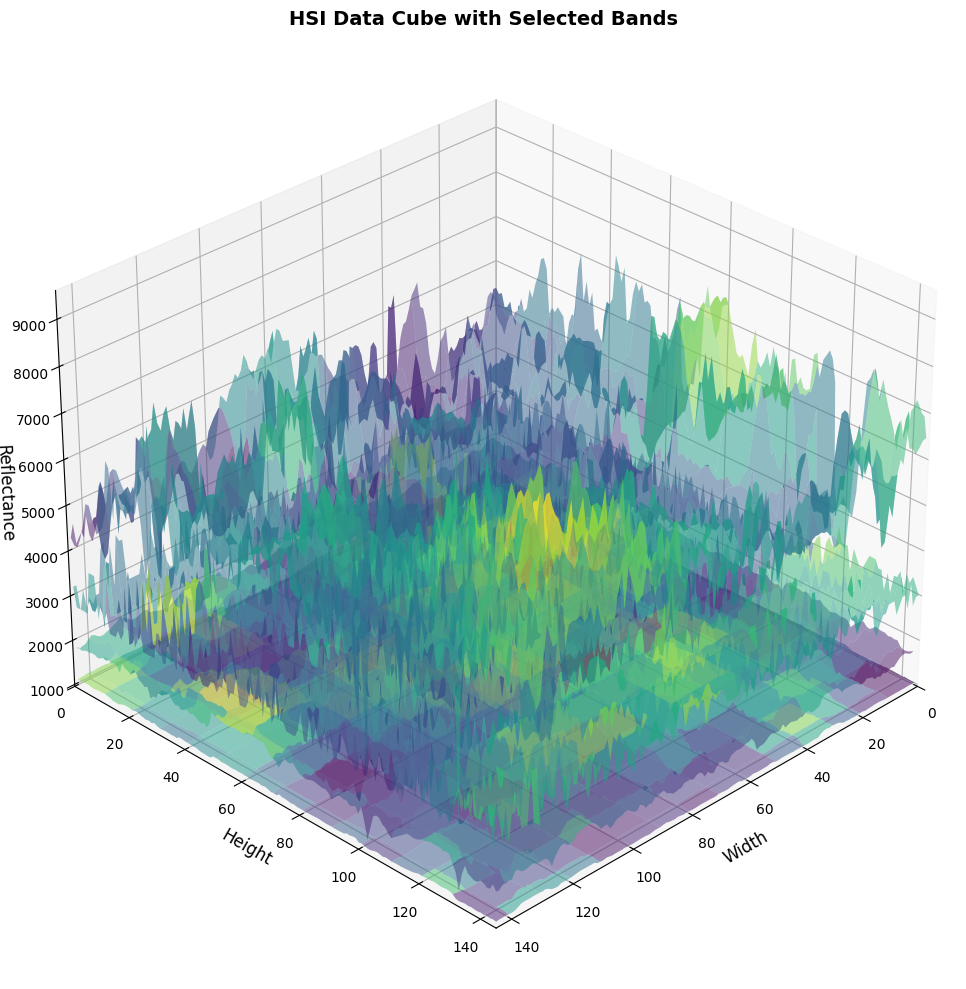

In [6]:
# Load Pavia dataset
data_pavia, labels_pavia = load_pavia()

# Example: Plot the spectral signature of pixel (100, 150)
plot_spectral_profiles(data_pavia, labels_pavia)

# Example: Visualize the first 3 principal components of the Pavia image
plot_pca_image(data_pavia, n_components=3)

plot_hsi_cube_slices(data_pavia)

# Load Indian Pines dataset
data_indian_pines, labels_indian_pines = load_indian_pines()

# Example: Plot the spectral signature of pixel (30, 40)
plot_spectral_profiles(data_indian_pines, labels_indian_pines)

# Example: Visualize the first 3 principal components of the Indian Pines image
plot_pca_image(data_indian_pines, n_components=3)

plot_hsi_cube_slices(data_indian_pines)

In [7]:
import scipy.io
import numpy as np
from collections import Counter

# Load the .mat file
mat_data = scipy.io.loadmat('/home/josh/Documents/Repos/SWEG 5350/Final/Data/Pavia_gt.mat')

# Access the ground truth labels using the appropriate key
# The key for labels in the Indian Pines dataset is usually 'indian_pines_gt'
labels = mat_data['pavia_gt']

# Flatten the label array to 1D for counting
flattened_labels = labels.flatten()

# Display the label counts (excluding the 0 label if it's considered padding)
label_counts = Counter(flattened_labels)
print("Label Counts (including padding label 0):")
for label, count in label_counts.items():
    print(f"Label {label}: {count}")

# If you want to exclude the padding label (0) from counts
non_zero_labels = flattened_labels[flattened_labels != 0]
non_zero_label_counts = Counter(non_zero_labels)
print("\nLabel Counts (excluding padding label 0):")
for label, count in non_zero_label_counts.items():
    print(f"Label {label}: {count}")


Label Counts (including padding label 0):
Label 0: 635488
Label 1: 65971
Label 6: 9248
Label 2: 7598
Label 9: 2863
Label 3: 3090
Label 5: 6584
Label 8: 42826
Label 4: 2685
Label 7: 7287

Label Counts (excluding padding label 0):
Label 1: 65971
Label 6: 9248
Label 2: 7598
Label 9: 2863
Label 3: 3090
Label 5: 6584
Label 8: 42826
Label 4: 2685
Label 7: 7287
